# Build a DecisionTreeClassifier for the Breast Cancer dataset

## Import libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import graphviz

## Load the Breast Cancer dataset into memory and display information about the number of features (dimensionality) and the number of objects (size)

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Objects: {df.shape[0]}")
df['target'] = data.target
print(f"Shape: {df.shape}")
print(df.head())

Number of Features: 30
Number of Objects: 569
Shape: (569, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ..

## Assign labels to the loaded data and display the number of classes

In [3]:
labels = data.target_names
feature_names = data.feature_names
print(f"Number of Classes: {len(labels)} \n {labels}")
print(f"Number of Features: {len(feature_names)} \n {feature_names}")

Number of Classes: 2 
 ['malignant' 'benign']
Number of Features: 30 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Split the data into training (70%) and test (30%) sets

In [4]:
X = df[feature_names]
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size=0.7, test_size=0.3)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_train.head(3))
print(X_test.head(3))

(398, 30) (398,)
(171, 30) (171,)
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
478        11.49         14.59           73.99      404.9          0.10460   
303        10.49         18.61           66.86      334.3          0.10680   
155        12.25         17.94           78.27      460.3          0.08654   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
478           0.08228         0.05308              0.01969         0.1779   
303           0.06678         0.02297              0.01780         0.1482   
155           0.06679         0.03885              0.02331         0.1970   

     mean fractal dimension  ...  worst radius  worst texture  \
478                 0.06574  ...         12.40          21.90   
303                 0.06600  ...         11.06          24.54   
155                 0.06228  ...         13.59          25.22   

     worst perimeter  worst area  worst smoothness  worst compactness  \
478       

## Normalize the data with StandardScaler



In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform instead of fit_transform for test set
print(X_train[0:3,:])

[[-0.74998027 -1.09978744 -0.74158608 -0.70188697  0.58459276 -0.42772603
  -0.45754987 -0.7605498  -0.09986038  0.45144364 -0.70061171 -0.06976187
  -0.6167312  -0.54340833 -0.70915256 -0.23548916  0.36208998 -0.62177677
  -0.24139043 -0.04596325 -0.7984831  -0.591967   -0.74660155 -0.71452908
   0.11632807 -0.34125524 -0.04627198 -0.6235968   0.07754241  0.45062841]
 [-1.02821446 -0.1392617  -1.02980434 -0.89473179  0.74288151 -0.73184316
  -0.84330079 -0.80880455 -1.15975947  0.48938568 -0.88760388  0.65038093
  -0.86919066 -0.62900544  0.66188352 -0.93600214 -0.46060034 -0.42348318
  -0.30503075 -0.15870653 -1.06870276 -0.16198127 -1.07434344 -0.86894147
   0.38200132 -0.97073687 -0.95489389 -0.7612376  -1.07145262 -0.29541379]
 [-0.53852228 -0.29934933 -0.56857428 -0.55056115 -0.714814   -0.73164695
  -0.63985593 -0.66812536  0.58175823 -0.05347746 -0.64407128 -0.40298663
  -0.65611867 -0.49980605 -0.51284035 -0.56379886 -0.39542981 -0.64124746
  -0.29523994 -0.47491916 -0.5585119

## Create and train the model with training data


In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Test and evaluate the accuracy of the model; display confusion matrix, accuracy, and F-score

In [7]:
# test for 10 instance
print('Input: ' + str(X_test[0:9]))
print('Output: ' + str(clf.predict(X_test[0:9,:])))
print('True value: ' + str(Y_test[0:9].values))

Input: [[-0.21855296  0.31710749 -0.14938447 -0.2872433   1.01628935  0.8401481
   0.71366732  0.82317615  1.10278606  1.54738509 -0.06299909 -0.49676845
   0.10742881 -0.15500641 -0.54923334 -0.14567981  0.11542304  0.28378104
  -0.41028206  0.10246308  0.01015933  0.67193047  0.16166188 -0.08348148
   1.08320449  0.86166719  1.25420187  1.36998461  1.0939611   1.51560644]
 [-0.27141746  1.44727832 -0.33290634 -0.33859574 -0.61624328 -1.02085253
  -0.78244669 -0.7352735  -0.67084979 -0.9932728  -0.68358146  0.26400709
  -0.73679181 -0.4783063  -0.42535719 -1.01213192 -0.56501333 -0.89282925
  -0.84842121 -0.72394135 -0.40525299  1.41626184 -0.47784158 -0.43769212
  -0.15805578 -0.95835576 -0.67112117 -0.84095647 -0.70686766 -0.88310324]
 [-0.04604776 -0.84412512 -0.11098232 -0.15121395 -1.2098261  -0.9470796
  -0.87020471 -0.58616888 -0.7779103  -0.99035418 -0.66382637 -0.99687769
  -0.59822384 -0.44475063 -0.75114448 -0.94337721 -0.77128156 -0.15687139
  -1.06381923 -0.61916982 -0.29

In [8]:
Y_predict = clf.predict(X_test)
Y_true = Y_test.values
print(confusion_matrix(Y_true, Y_predict))

[[ 60   3]
 [  6 102]]


In [9]:
accuracy = accuracy_score(Y_true, Y_predict)
f1 = f1_score(Y_true, Y_predict, average=None)
print(f"Accuracy: {accuracy}, F1 Score: {f1}")


Accuracy: 0.9473684210526315, F1 Score: [0.93023256 0.95774648]


## Visualize the decision tree using sklearn built-in tools



|--- feature_27 <= 0.41
|   |--- feature_23 <= 0.10
|   |   |--- class: 1
|   |--- feature_23 >  0.10
|   |   |--- class: 0
|--- feature_27 >  0.41
|   |--- feature_13 <= -0.55
|   |   |--- class: 1
|   |--- feature_13 >  -0.55
|   |   |--- class: 0



[Text(0.5, 0.8333333333333334, 'worst concave points <= 0.414\ngini = 0.468\nsamples = 398\nvalue = [149, 249]\nclass = benign'),
 Text(0.25, 0.5, 'worst area <= 0.098\ngini = 0.147\nsamples = 263\nvalue = [21, 242]\nclass = benign'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.077\nsamples = 250\nvalue = [10, 240]\nclass = benign'),
 Text(0.375, 0.16666666666666666, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = malignant'),
 Text(0.75, 0.5, 'area error <= -0.552\ngini = 0.098\nsamples = 135\nvalue = [128, 7]\nclass = malignant'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = benign'),
 Text(0.875, 0.16666666666666666, 'gini = 0.059\nsamples = 132\nvalue = [128, 4]\nclass = malignant')]

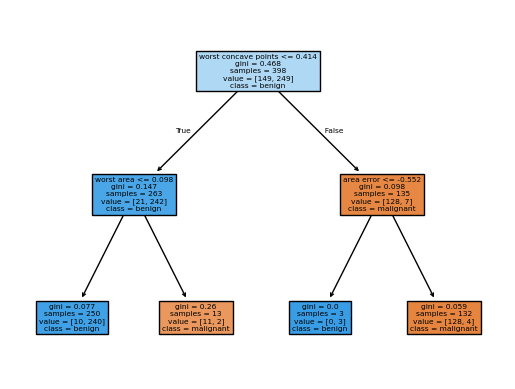

In [10]:
# visualizing using sklearn built-in tools
text_representation = tree.export_text(clf)
print(text_representation)
tree.plot_tree(clf, feature_names=feature_names, class_names=list(labels), filled=True)

## Visualize the decision tree using graphviz

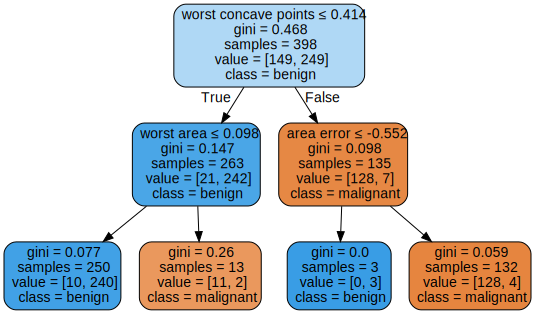

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=data.feature_names, 
                                   class_names=data.target_names, filled=True, 
                                   rounded=True, special_characters=True, fontname="Arial") 
graph = graphviz.Source(dot_data)
# graph.render("wine_decision_tree")  # Uncomment to save the graph
graph